# **1. Data Pre-Processing**
The process of transforming raw data into an understandable format.

## **1.1 Import the Libraries and Dataset**

**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Pim
path="/content/drive/MyDrive/KDAI/Semester 2 1/Data Mining & Business Analytics/SyntheticFinancial.csv"
df=pd.read_csv(path)

df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
#Ton
#path="/content/drive/MyDrive/Fraud.csv"
#df=pd.read_csv(path)

In [ ]:
#Mew
#path="/content/drive/MyDrive/PS_20174392719_1491204439457_log.csv"
#df=pd.read_csv(path)

## **1.2 Exploratory Data Analysis**
Exploratory Data Analysis on the data

##Description

Features for Synthetic Financial Datasets For Fraud Detection:

1. step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).
2. type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.
3. amount - amount of the transaction in local currency.
4. nameOrig - customer who started the transaction
5. oldbalanceOrg - initial balance before the transaction
6. newbalanceOrig - new balance after the transaction
7. nameDest - customer who is the recipient of the transaction
8. oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).
9. newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).
10. isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.
11. isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.
(is_fraud = 1 denotes a fraudulent transaction, while is_fraud = 0 denotes a legitimate (non-fraudulent) transaction.)

## **1.2.1 Data Exploration**

For EDA (Exploratory Data Analysis), we used this library that provides almost all the relevent information we need.


In [ ]:
# checking sample rows and all columns of data
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [ ]:
# checking dimensions of data
df.shape

(6362620, 11)

In [ ]:
# checking description of columns
df.describe(include="all")

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6362620,6.362620e+06,6362620,6.362620e+06,6.362620e+06,6362620,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
unique,NaN,5,NaN,6353307,NaN,NaN,2722362,NaN,NaN,NaN,NaN
top,NaN,CASH_OUT,NaN,C1902386530,NaN,NaN,C1286084959,NaN,NaN,NaN,NaN
freq,NaN,2237500,NaN,3,NaN,NaN,113,NaN,NaN,NaN,NaN
mean,2.433972e+02,NaN,1.798619e+05,NaN,8.338831e+05,8.551137e+05,NaN,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,NaN,6.038582e+05,NaN,2.888243e+06,2.924049e+06,NaN,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,NaN,1.338957e+04,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,NaN,7.487194e+04,NaN,1.420800e+04,0.000000e+00,NaN,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,NaN,2.087215e+05,NaN,1.073152e+05,1.442584e+05,NaN,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00


In [ ]:
# checking all column names
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

##1.2.2 Data Preparation

**Check 'Null' and 'Missing Value'**

In [ ]:
# checking data type and value of columns
def details(df):
    sum_null_values = df.isnull().sum()
    percent_null_values = 100* (sum_null_values/len(df))
    data_type = df.dtypes
    unique_values = df.nunique()

    table = pd.concat([sum_null_values,percent_null_values,data_type,unique_values], axis=1)
    table_col = table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Missing Values', 2 : 'Data_Type', 3: 'Unique values'})
    return table_col

details(df)

,Missing Values,% of Total Missing Values,Data_Type,Unique values
step,0,0.0,int64,743
type,0,0.0,object,5
amount,0,0.0,float64,5316900
nameOrig,0,0.0,object,6353307
oldbalanceOrg,0,0.0,float64,1845844
newbalanceOrig,0,0.0,float64,2682586
nameDest,0,0.0,object,2722362
oldbalanceDest,0,0.0,float64,3614697
newbalanceDest,0,0.0,float64,3555499
isFraud,0,0.0,int64,2


**Convert "isFraud" and "isFlaggedFraud" from int to Category**




In [ ]:
dfis_fraud = df.isFraud.astype("category")

In [ ]:
dfis_FlaggedFraud	 = df.isFlaggedFraud.astype("category")

##**1.2.3 Data Analysis**

###**Check Dependent Variable 'isFraud' and 'isFlaggedFraud'**

In [ ]:
#Groupby Fraud and Non-Fraud

non_fraud = df[df['isFraud'] == 0]
fraud = df[df['isFraud'] == 1]

print(len(non_fraud))
print(len(fraud))

6354407
8213


In [ ]:
#Groupby FlaggedFraud and Non-FlaggedFraud
non_FlaggedFraud = df[df['isFlaggedFraud'] == 0]
FlaggedFraud = df[df['isFlaggedFraud'] == 1]

print(len(non_FlaggedFraud))
print(len(FlaggedFraud))

6362604
16


In [ ]:
#Check relation between 'isFraud' and 'isFlaggedFraud'

FlaggedFraud

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


From above, 'isFlaggedFraud' is subset of 'isFraud', we can use only 'isFraud' for dependent variable and drop 'isFlaggedFraud'.

In [ ]:
#Drop  'isFlaggedFraud'

df.drop(columns="isFlaggedFraud" , inplace=True)
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


##**1.3 Visualization**

###**1.3.1 Dependent Variable, "isFraud"**

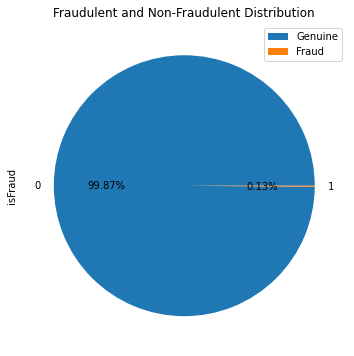

In [ ]:
round(100*df['isFraud'].value_counts(normalize=True),2).plot(kind='pie', figsize=(6, 6), autopct='%1.2f%%')
plt.title("Fraudulent and Non-Fraudulent Distribution")
plt.legend(["Genuine", "Fraud"])
plt.show()

From the above graphs we can see the imbalance of the data

### **1.3.2 "Step"**

**Covert step to day**





/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


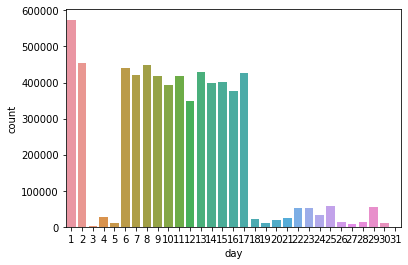

In [ ]:
#Transform 'Step' from int to date
df["day"] = df.step/24
df.day=df['day'].apply(np.ceil)
df.day=df.day.astype("int")

sns.countplot("day",data =df)

**The graph shows the fraud attack day of a month**

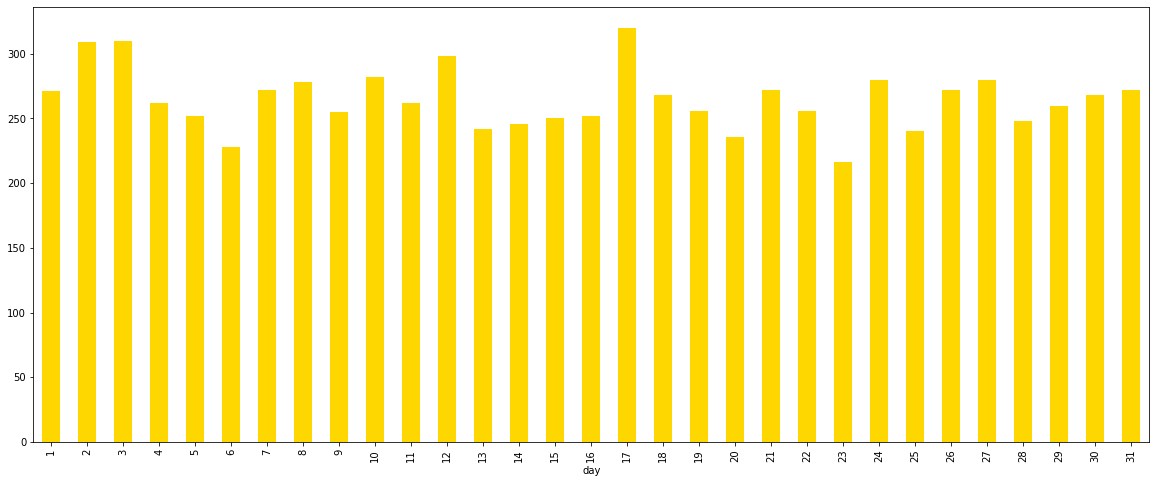

In [ ]:
#The below graph shows the fraud attack day of a month

df.groupby(['day'])["isFraud"].apply(lambda x : x.astype(int).sum()).plot(kind='bar', figsize=(20,8),color ="gold")

There is no pattern

**Covert step to week**

**The graph shows the fraud attack day of a week**

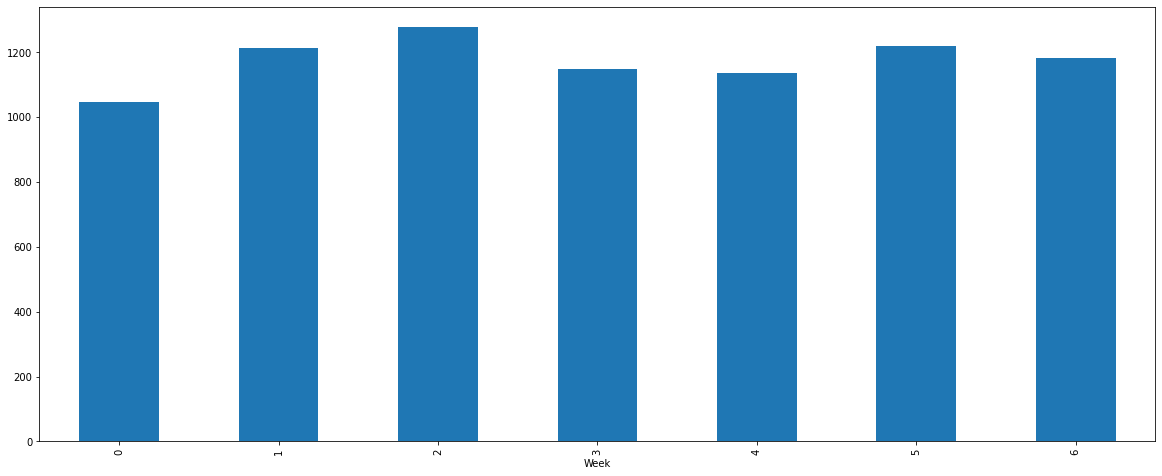

In [ ]:
#The below graph shows the fraud attack day of a week

df["Week"] = df.step%7
fraud_w = df[df['isFraud'] == 1]

fraud_w.groupby(['Week'])["isFraud"].apply(lambda x : x.astype(int).sum()).plot(kind='bar', figsize=(20,8))

There is no pattern

**The graph shows the fraud attack attack every hour in the 744 hours**

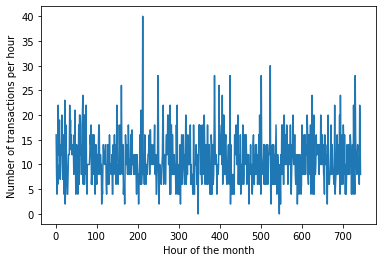

In [ ]:
#The below graph shows the fraud attack every hour in the 744 hours

sns.lineplot(x=list(range(1,744)),y=df.groupby("step")["isFraud"].sum())
plt.xlabel("Hour of the month")
plt.ylabel("Number of transactions per hour")
plt.show()

As above expected there are peaks and troughs and also a very big peak. Another analysis that can be interesting is at which hour of a day, the fraud attacks generally happen. From the step variable, we can get the hour of day

**The graph shows the fraud attack attack hour of a day**

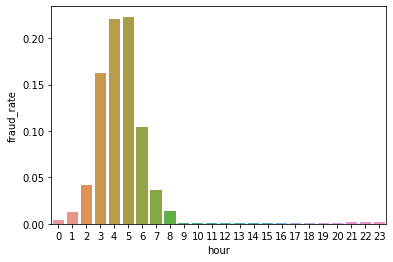

In [ ]:
#The below graph shows the fraud attack hour of a day

df["hour"] = df.step % 24
frauds_hour = pd.concat([df.groupby("hour")["isFraud"].sum(),df.groupby("hour")["isFraud"].count()],axis=1)
frauds_hour.columns = ["Frauds","Transactions"]
frauds_hour["fraud_rate"] = frauds_hour.Frauds/frauds_hour.Transactions
sns.barplot(x=frauds_hour.index,y=frauds_hour.fraud_rate)
plt.show()

In [ ]:
frauds_hour.Frauds

hour
0     300
1     358
2     372
3     326
4     274
5     366
6     358
7     328
8     368
9     341
10    375
11    324
12    339
13    346
14    353
15    341
16    345
17    353
18    343
19    342
20    340
21    347
22    351
23    323
Name: Frauds, dtype: int64

In [ ]:
frauds_hour.Transactions

hour
0      71587
1      27111
2       9018
3       2007
4       1241
5       1641
6       3420
7       8988
8      26915
9     283518
10    425729
11    445992
12    483418
13    468474
14    439653
15    416686
16    441612
17    439941
18    580509
19    647814
20    553728
21    247806
22    194555
23    141257
Name: Transactions, dtype: int64

In [ ]:
frauds_hour["fraud_rate"]
#ต้องเอาตัวนี้ไปใส่ โดยดูจาก Hour

hour
0     0.004191
1     0.013205
2     0.041251
3     0.162431
4     0.220790
5     0.223035
6     0.104678
7     0.036493
8     0.013673
9     0.001203
10    0.000881
11    0.000726
12    0.000701
13    0.000739
14    0.000803
15    0.000818
16    0.000781
17    0.000802
18    0.000591
19    0.000528
20    0.000614
21    0.001400
22    0.001804
23    0.002287
Name: fraud_rate, dtype: float64

In [ ]:
# create a list of our conditions
conditions1 = [
    (df['hour'] == 0),
    (df['hour'] == 1),
    (df['hour'] == 2),
    (df['hour'] == 3),
    (df['hour'] == 4),
    (df['hour'] == 5),
    (df['hour'] == 6),
    (df['hour'] == 7),
    (df['hour'] == 8),
    (df['hour'] == 9),
    (df['hour'] == 10),
    (df['hour'] == 11),
    (df['hour'] == 12),
    (df['hour'] == 13),
    (df['hour'] == 14),
    (df['hour'] == 15),
    (df['hour'] == 16),
    (df['hour'] == 17),
    (df['hour'] == 18),
    (df['hour'] == 19),
    (df['hour'] == 20),
    (df['hour'] == 21),
    (df['hour'] == 22),
    (df['hour'] == 23)
    ]

    # create a list of the values we want to assign for each condition
rate = [0.004191,0.013205,0.041251,0.162431,0.220790,0.223035,0.104678,0.036493,0.013673,0.001203,0.000881,0.000726,0.000701,0.000739,0.000803,0.000818,0.000781,0.000802,0.000591,0.000528,0.000614,0.001400,0.001804, 0.002287]

# create a new column and use np.select to assign values to it using our lists as arguments
df['fraud_rate'] = np.select(conditions1,rate)

# display updated DataFrame
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,day,Week,hour,fraud_rate
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,1,1,1,0.013205
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,1,1,1,0.013205
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,1,1,1,0.013205
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,1,1,1,0.013205
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,1,1,1,0.013205


The above plot shows the frauds at different hours of day. **It tells that frauds happen during sleeping hours the most, the transactions that happen during 3 AM to 6 AM are fraud transactions and most peak fraud transection during 4 AM and 5 AM**.

###**1.3.3 "Amonth"**

**The graph shows the fraudulent and amount pattern**

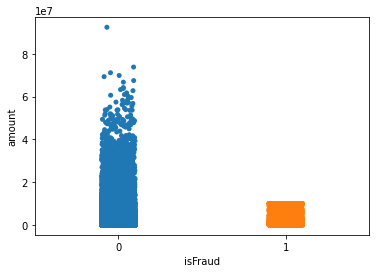

In [ ]:
#Univariate Analysis of fraud
sns.stripplot( x = df['isFraud'], y= df['amount'], data=df)

**Check Total Transaction Amount**

In [ ]:
print('Data: non_fraud: ',df['amount'].loc[df['isFraud'] == 0].sum())
print('Data: fraud: ',df['amount'].loc[df['isFraud'] == 1].sum())

Data: non_fraud:  1132336529331.9312
Data: fraud:  12056415427.839998


From above, the fraudulent transaction amount is more than that of normal transactions.

In [ ]:
fraud.amount.count()

8213

<function matplotlib.pyplot.show(*args, **kw)>

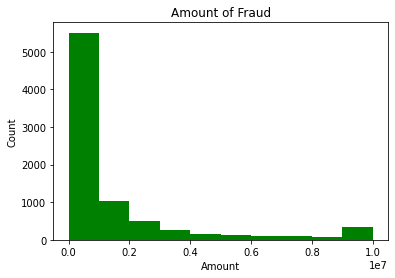

In [ ]:
plt.hist(fraud.amount,bins=10,color="Green")
plt.title("Amount of Fraud")
plt.ylabel("Count")
plt.xlabel("Amount")
plt.show

In [ ]:
# Top fraudulent transaction amount
fraud[fraud['isFraud'] == 1]['amount'].sort_values(ascending=False)[:10]

3760283    10000000.0
5987587    10000000.0
1707592    10000000.0
1707591    10000000.0
1707590    10000000.0
1707589    10000000.0
6055664    10000000.0
6351219    10000000.0
6351220    10000000.0
6351221    10000000.0
Name: amount, dtype: float64

In [ ]:
#Top 10 fradualent nameOrig with amount
fraud.groupby(['nameOrig'])['amount'].sum().sort_values(ascending=False)[:10]

nameOrig
C99979309      10000000.0
C327855497     10000000.0
C315149365     10000000.0
C313051938     10000000.0
C1596180537    10000000.0
C298387535     10000000.0
C292642955     10000000.0
C1111699947    10000000.0
C1110953726    10000000.0
C291823113     10000000.0
Name: amount, dtype: float64

In [ ]:
#Top 10 fradualent nameDest with amount
fraud.groupby(['nameDest'])['amount'].sum().sort_values(ascending=False)[:10]

nameDest
C668046170     10160088.68
C1630566944    10000000.00
C666339947     10000000.00
C1590217660    10000000.00
C1595458981    10000000.00
C1056895901    10000000.00
C650095152     10000000.00
C1614528665    10000000.00
C1622860679    10000000.00
C1054420449    10000000.00
Name: amount, dtype: float64

From above Top 10 fradualent amount is around 10,000,000

Amount with cashout and transfer

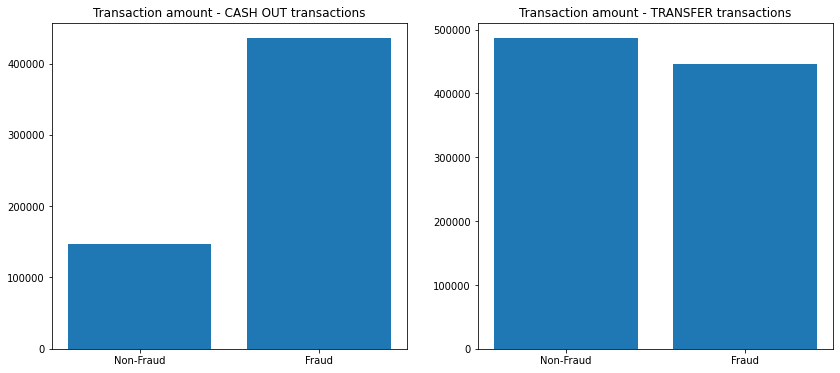

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(14,6))
ax[0].title.set_text("Transaction amount - CASH OUT transactions")
ax[0].bar(x=["Non-Fraud","Fraud"],height=df[df.type=="CASH_OUT"].groupby("isFraud")["amount"].median())
ax[1].title.set_text("Transaction amount - TRANSFER transactions")
ax[1].bar(x=["Non-Fraud","Fraud"],height=df[df.type=="TRANSFER"].groupby("isFraud")["amount"].median())
fig.show()

**Amount and OldbalanceOrg**

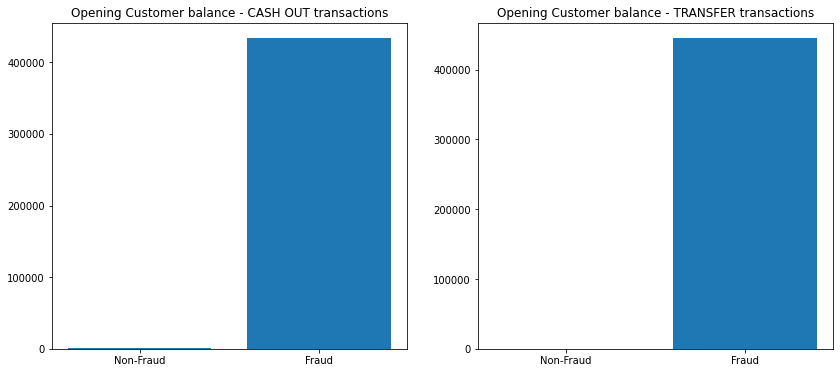

In [ ]:
#Amount and OldbalanceOrg

fig,ax=plt.subplots(1,2,figsize=(14,6))
ax[0].title.set_text("Opening Customer balance - CASH OUT transactions")
ax[0].bar(x=["Non-Fraud","Fraud"],height=df[df.type=="CASH_OUT"].groupby("isFraud")["oldbalanceOrg"].median())
ax[1].title.set_text("Opening Customer balance - TRANSFER transactions")
ax[1].bar(x=["Non-Fraud","Fraud"],height=df[df.type=="TRANSFER"].groupby("isFraud")["oldbalanceOrg"].median())
fig.show()

From the plots, we can see that these variables are abnormally high for fraud and tranfer transactions compared to non-fraud and tranfer transactions

**Amount and OldbalanceDest**

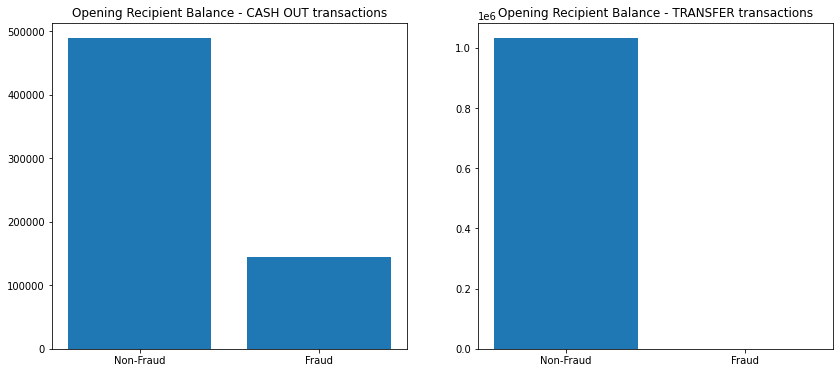

In [ ]:
#Amount and OldbalanceDest

fig,ax=plt.subplots(1,2,figsize=(14,6))
ax[0].title.set_text("Opening Recipient Balance - CASH OUT transactions")
ax[0].bar(x=["Non-Fraud","Fraud"],height=df[df.type=="CASH_OUT"].groupby("isFraud")["oldbalanceDest"].median())
ax[1].title.set_text("Opening Recipient Balance - TRANSFER transactions")
ax[1].bar(x=["Non-Fraud","Fraud"],height=df[df.type=="TRANSFER"].groupby("isFraud")["oldbalanceDest"].median())
fig.show()

From the plots, we can see that this variable is very less for transfer fraud transactions compared to transfer non-fraud transactions which is reverse of what we observed in customer balance.

**Compare day and month with amount**

**Amount and Day of a Mounth**

In [ ]:
df1=df.copy()

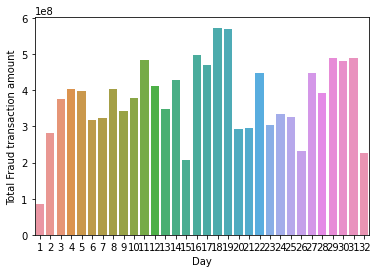

In [ ]:
#The plot shows the total fraud transaction amount on a daily basis

df1["day"] = round(df1.step/24)
sns.barplot(x=list(range(1,33)),y=df1[df1.isFraud==1].groupby("day")["amount"].sum())
plt.xlabel("Day")
plt.ylabel("Total Fraud transaction amount")
plt.show()

**Amount and Day of a Week**

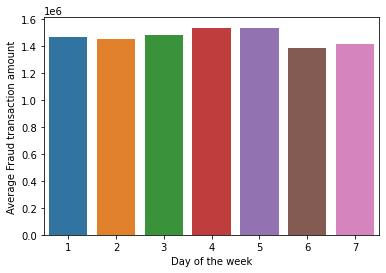

In [ ]:
#the fraud transactions per day of the week

df1["dayweek"] = df1.day % 7
sns.barplot(x=list(range(1,8)),y=df1[df1.isFraud==1].groupby("dayweek")["amount"].mean())
plt.xlabel("Day of the week")
plt.ylabel("Average Fraud transaction amount")
plt.show()

###**1.3.4 "OldbalanceOrg" and NewbalanceOrg**

In [ ]:
# create a list of our conditions
conditions = [
    (df['oldbalanceOrg'] == 0) & (df['newbalanceOrig'] == 0),
    (df['oldbalanceOrg'] > 0) & (df['newbalanceOrig'] == 0),
    (df['oldbalanceOrg'] == 0) & (df['newbalanceOrig'] > 0),
    (df['oldbalanceOrg'] > 0 & (df['newbalanceOrig'] > 0)),
    ]

    # create a list of the values we want to assign for each condition
values = ['S1', 'S2', 'S3', 'S4']

# create a new column and use np.select to assign values to it using our lists as arguments
df['section'] = np.select(conditions, values)

# display updated DataFrame
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,day,Week,hour,fraud_rate,section
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,1,1,1,0.013205,S4
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,1,1,1,0.013205,S4
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,1,1,1,0.013205,S2
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,1,1,1,0.013205,S2
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,1,1,1,0.013205,S4


In [ ]:
print(df.section.unique())

['S4' 'S2' 'S1' 'S3']


S2    8012
S4     160
S1      41
Name: section, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Section of Fraud')

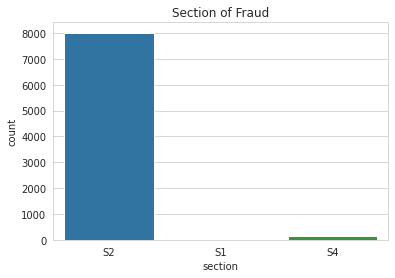

In [ ]:
fraud_section = df[((df['section'] == "S1") | (df['section'] == "S2") | (df['section'] == "S3") | (df['section'] == "S4")) & (df['isFraud'] == 1)]

print(fraud_section['section'].value_counts())
sns.set_style("whitegrid")
sns.countplot(fraud_section['section'],data =fraud_section)
plt.title("Section of Fraud")


###**1.3.5 "NameDest"**

In [ ]:
df['DestType']=df['nameDest'].str[0]
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,day,Week,hour,fraud_rate,section,DestType
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,1,1,1,0.013205,S4,M
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,1,1,1,0.013205,S4,M
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,1,1,1,0.013205,S2,C
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,1,1,1,0.013205,S2,C
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,1,1,1,0.013205,S4,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,31,1,23,0.002287,S2,C
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,31,1,23,0.002287,S2,C
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,31,1,23,0.002287,S2,C
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,31,1,23,0.002287,S2,C


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


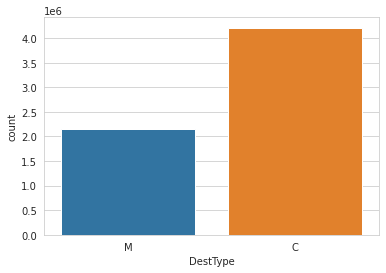

In [ ]:
sns.countplot(df['DestType'],data =df)

In [ ]:
fraud_DestType = df[df['isFraud'] == 1]

print(fraud_DestType['DestType'].value_counts())

C    8213
Name: DestType, dtype: int64


As above the fraud transection is only happen with DestType "C"

Text(0.5, 1.0, 'DestType of Fraud')

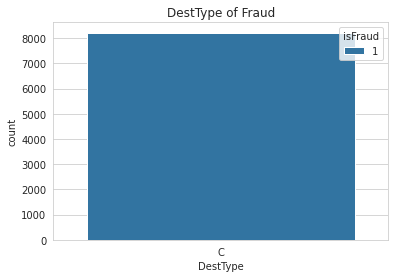

In [ ]:
sns.countplot(x="DestType", hue='isFraud', data=fraud_DestType)
plt.title("DestType of Fraud")


###**1.3.6 "Type"**

From above CASH_OUT and Transfer numbers with highest fraud transactions

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Type')

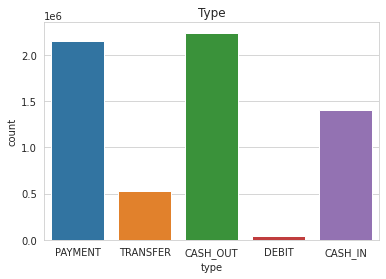

In [ ]:
print(df.type.value_counts())
sns.countplot("type",data =df)
plt.title("Type")

**Check Transaction Type**

In [ ]:
# Credit card type with most 'isFraud' transactions
df.groupby('type')['isFraud'].sum().sort_values(ascending=False)[:10]

type
CASH_OUT    4116
TRANSFER    4097
CASH_IN        0
DEBIT          0
PAYMENT        0
Name: isFraud, dtype: int64

Text(0.5, 1.0, 'Type of Fraud')

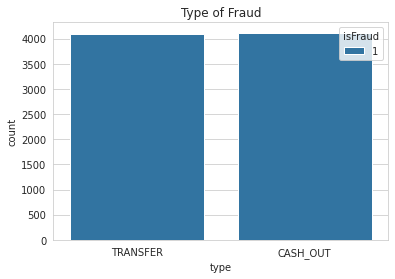

In [ ]:
sns.countplot(x="type", hue='isFraud', data=fraud)
plt.title("Type of Fraud")

**Check Top fraudulent transaction**

In [ ]:
#Aggregation of amount by category for fraudualent transactions
fraud.groupby(['type'])['amount'].agg(['sum'])

,sum
type,
CASH_OUT,5.989202e+09
TRANSFER,6.067213e+09


###**1.3.7 "NewbalanceDest"**

In [ ]:
newDest_0 = df[df['newbalanceDest'] == 0]
newDest_N = df[df['newbalanceDest'] > 0]

In [ ]:
#หลังจากทำ Transection มีแค่จำนวน 160 ที่เป็น Fraud และยังคงเงินอยู้ในบัญชี
print(newDest_N['isFraud'].value_counts())

0    3919065
1       4122
Name: isFraud, dtype: int64


Text(0.5, 1.0, 'newbalanceDest with N of Fraud')

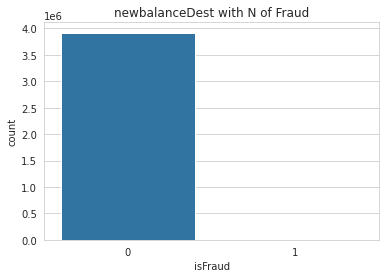

In [ ]:
#fig, axes = plt.subplots(figsize=(10,10))
sns.countplot(x="isFraud", data=newDest_N)
plt.title("newbalanceDest with N of Fraud")
#สเกลไม่ชัด

In [ ]:
print(newDest_0['isFraud'].value_counts())
#บัญชีปลายทางส้วนใหญ่เงินจะเป็น 0 หลังจากทำ Transection

0    2435342
1       4091
Name: isFraud, dtype: int64


Text(0.5, 1.0, 'newbalanceDest with 0 of Fraud')

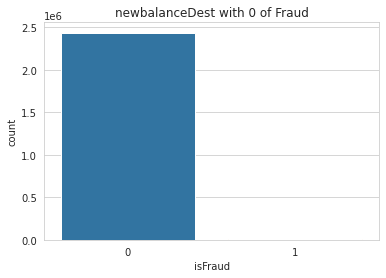

In [ ]:
sns.countplot(x="isFraud", data=newDest_0)
plt.title("newbalanceDest with 0 of Fraud")

<BarContainer object of 2 artists>

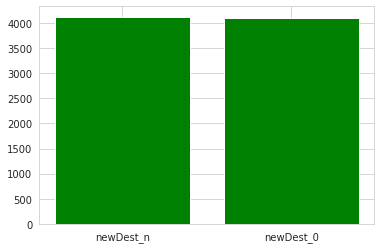

In [ ]:
fraudcount=[4122,4091]
name=["newDest_n","newDest_0"]
plt.bar(name,fraudcount,color="Green")

In [ ]:
newDest_Plot = df[(df['newbalanceDest'] > 0) & df['isFraud'] == 1]

<function matplotlib.pyplot.show(*args, **kw)>

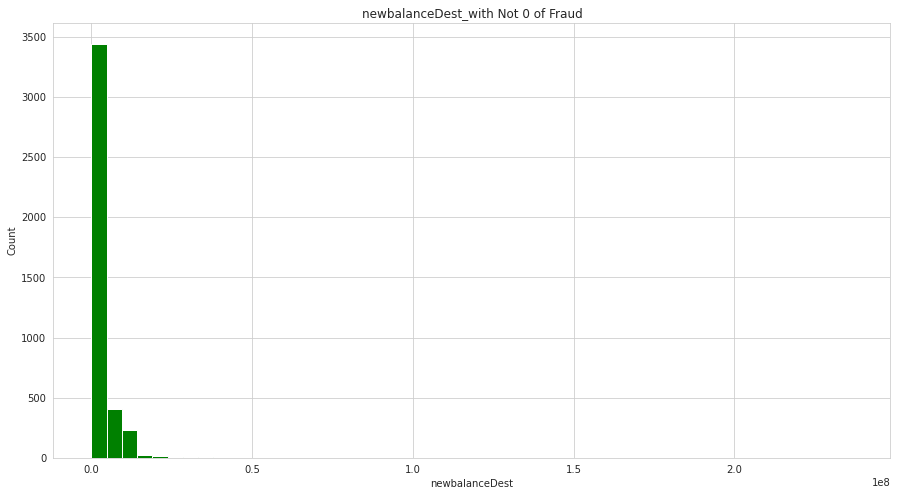

In [ ]:
plt.hist(newDest_Plot.newbalanceDest,bins=50,color="Green")
plt.gcf().set_size_inches(15, 8)
plt.title("newbalanceDest_with Not 0 of Fraud")
plt.ylabel("Count")
plt.xlabel("newbalanceDest")
plt.show

###**1.3.8 "OldbalanceDest"**

In [ ]:
#Check origibal decstination account balance before transection

oldDest_0 = df[df['oldbalanceDest'] == 0]
oldDest_N = df[df['oldbalanceDest'] > 0]

print(oldDest_N['isFraud'].value_counts())

0    3655370
1       2862
Name: isFraud, dtype: int64


In [ ]:
print(oldDest_0['isFraud'].value_counts())
#บัญชีปลายทางส่วนใหญ่มีเงิน 0 บาทก่อน Transection

0    2699037
1       5351
Name: isFraud, dtype: int64


<BarContainer object of 2 artists>

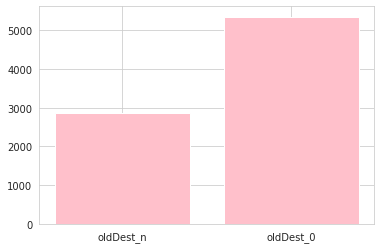

In [ ]:
fraudcount=[2862,5351]
name=["oldDest_n","oldDest_0"]
plt.bar(name,fraudcount,color="pink")

In [ ]:
oldDest_Plot = df[(df['oldbalanceDest'] > 0) & df['isFraud'] == 1]

<function matplotlib.pyplot.show(*args, **kw)>

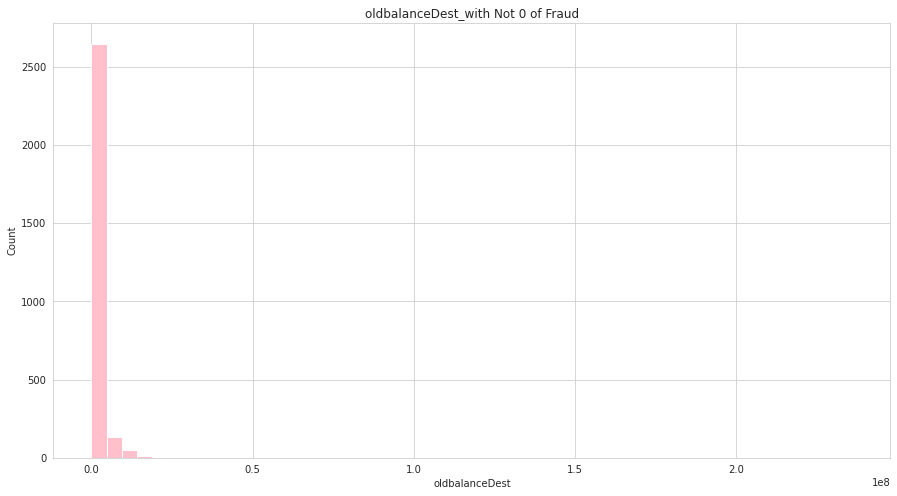

In [ ]:
plt.hist(oldDest_Plot.oldbalanceDest,bins=50,color="pink")
plt.gcf().set_size_inches(15, 8)
plt.title("oldbalanceDest_with Not 0 of Fraud")
plt.ylabel("Count")
plt.xlabel("oldbalanceDest")
plt.show

In [ ]:
section1 = df.loc[(df.oldbalanceDest == 0) & (df.newbalanceDest == 0) & (df.isFraud == 1)]
section2 = df.loc[(df.oldbalanceDest > 0) & (df.newbalanceDest == 0) & (df.isFraud == 1)]
section3 = df.loc[(df.oldbalanceDest == 0) & (df.newbalanceDest > 0) & (df.isFraud == 1)]
section4 = df.loc[(df.oldbalanceDest > 0) & (df.newbalanceDest > 0) & (df.isFraud == 1)]

print(section1.shape,section2.shape,section3.shape,section4.shape)

(4076, 16) (15, 16) (1275, 16) (2847, 16)


###**1.3.9 "Error Transection Amount"**

In [ ]:
#Error Transection Amount between newbalanceOrig vs oldbalanceOrg
df['errorBalanceOrig'] = df.newbalanceOrig + df.amount - df.oldbalanceOrg

#Error Transection Amount between oldbalanceDest vs newbalanceDest
df['errorBalanceDest'] = df.oldbalanceDest + df.amount - df.newbalanceDest

df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,day,Week,hour,fraud_rate,section,DestType,errorBalanceOrig,errorBalanceDest
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,1,1,1,0.013205,S4,M,0.0,9.839640e+03
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,1,1,1,0.013205,S4,M,0.0,1.864280e+03
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,1,1,1,0.013205,S2,C,0.0,1.810000e+02
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,1,1,1,0.013205,S2,C,0.0,2.136300e+04
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,1,1,1,0.013205,S4,M,0.0,1.166814e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,31,1,23,0.002287,S2,C,0.0,0.000000e+00
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,31,1,23,0.002287,S2,C,0.0,6.311409e+06
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,31,1,23,0.002287,S2,C,0.0,1.000000e-02
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,31,1,23,0.002287,S2,C,0.0,8.500025e+05


In [ ]:
ErrorOrg_0 = df[df['errorBalanceOrig'] == 0]
ErrorOrg_N = df[df['errorBalanceOrig'] > 0]

In [ ]:
print(ErrorOrg_0['isFraud'].value_counts())

0    1141995
1       8156
Name: isFraud, dtype: int64


In [ ]:
print(ErrorOrg_N['isFraud'].value_counts())

0    5106782
1         52
Name: isFraud, dtype: int64


<BarContainer object of 2 artists>

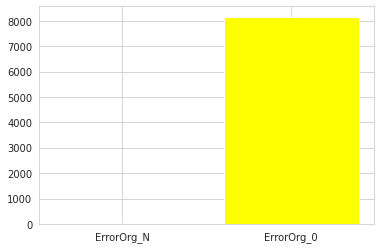

In [ ]:
fraudcount=[52,8156]
name=["ErrorOrg_N","ErrorOrg_0"]
plt.bar(name,fraudcount,color="yellow")

In [ ]:
Errororg_Plot = df[(df['errorBalanceOrig'] > 0) & df['isFraud'] == 1]

<function matplotlib.pyplot.show(*args, **kw)>

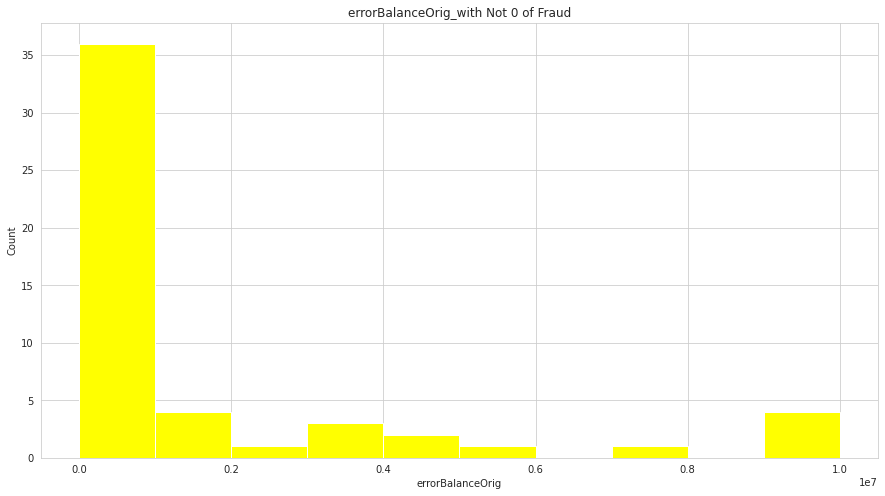

In [ ]:
plt.hist(Errororg_Plot.errorBalanceOrig,bins=10,color="yellow")
plt.gcf().set_size_inches(15, 8)
plt.title("errorBalanceOrig_with Not 0 of Fraud")
plt.ylabel("Count")
plt.xlabel("errorBalanceOrig")
plt.show

In [ ]:
ErrorDest_0 = df[df['errorBalanceDest'] == 0]
ErrorDest_N = df[df['errorBalanceDest'] > 0]

In [ ]:
print(ErrorDest_0['isFraud'].value_counts())

0    1623057
1       2889
Name: isFraud, dtype: int64


In [ ]:
print(ErrorDest_N['isFraud'].value_counts())

0    4075671
1       4692
Name: isFraud, dtype: int64


<BarContainer object of 2 artists>

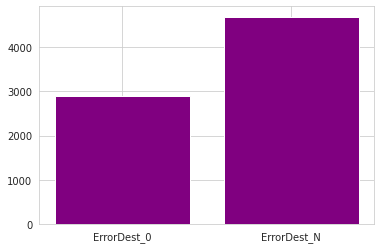

In [ ]:
fraudcount=[2889,4692]
name=["ErrorDest_0","ErrorDest_N"]
plt.bar(name,fraudcount,color="purple")

In [ ]:
Errordest_Plot = df[(df['errorBalanceDest'] > 0) & df['isFraud'] == 1]

<function matplotlib.pyplot.show(*args, **kw)>

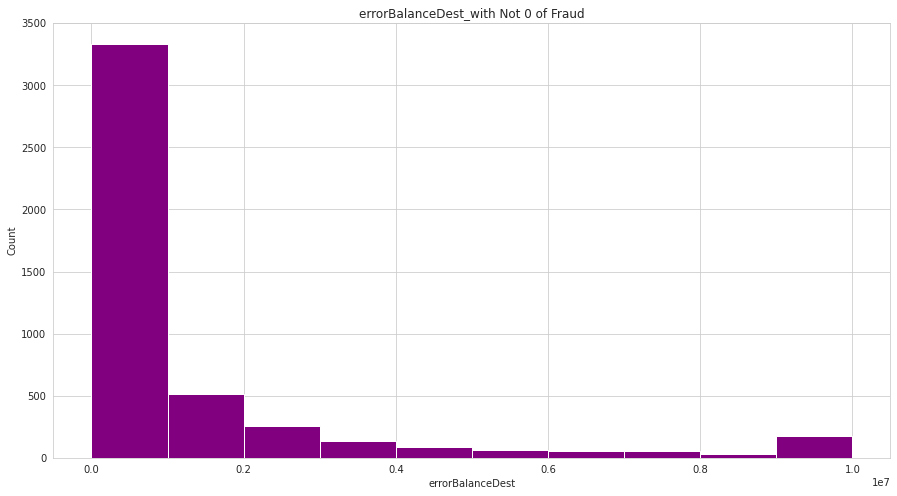

In [ ]:
plt.hist(Errordest_Plot.errorBalanceDest,bins=10,color="purple")
plt.gcf().set_size_inches(15, 8)
plt.title("errorBalanceDest_with Not 0 of Fraud")
plt.ylabel("Count")
plt.xlabel("errorBalanceDest")
plt.show

###**Correlation matrix**

To see how features are correlated is useful to look at the correlation matrix that is a matrix in which are showed the correlation values of each couple of features according to the Pearson's correlation coefficient

Dropping redundant columns

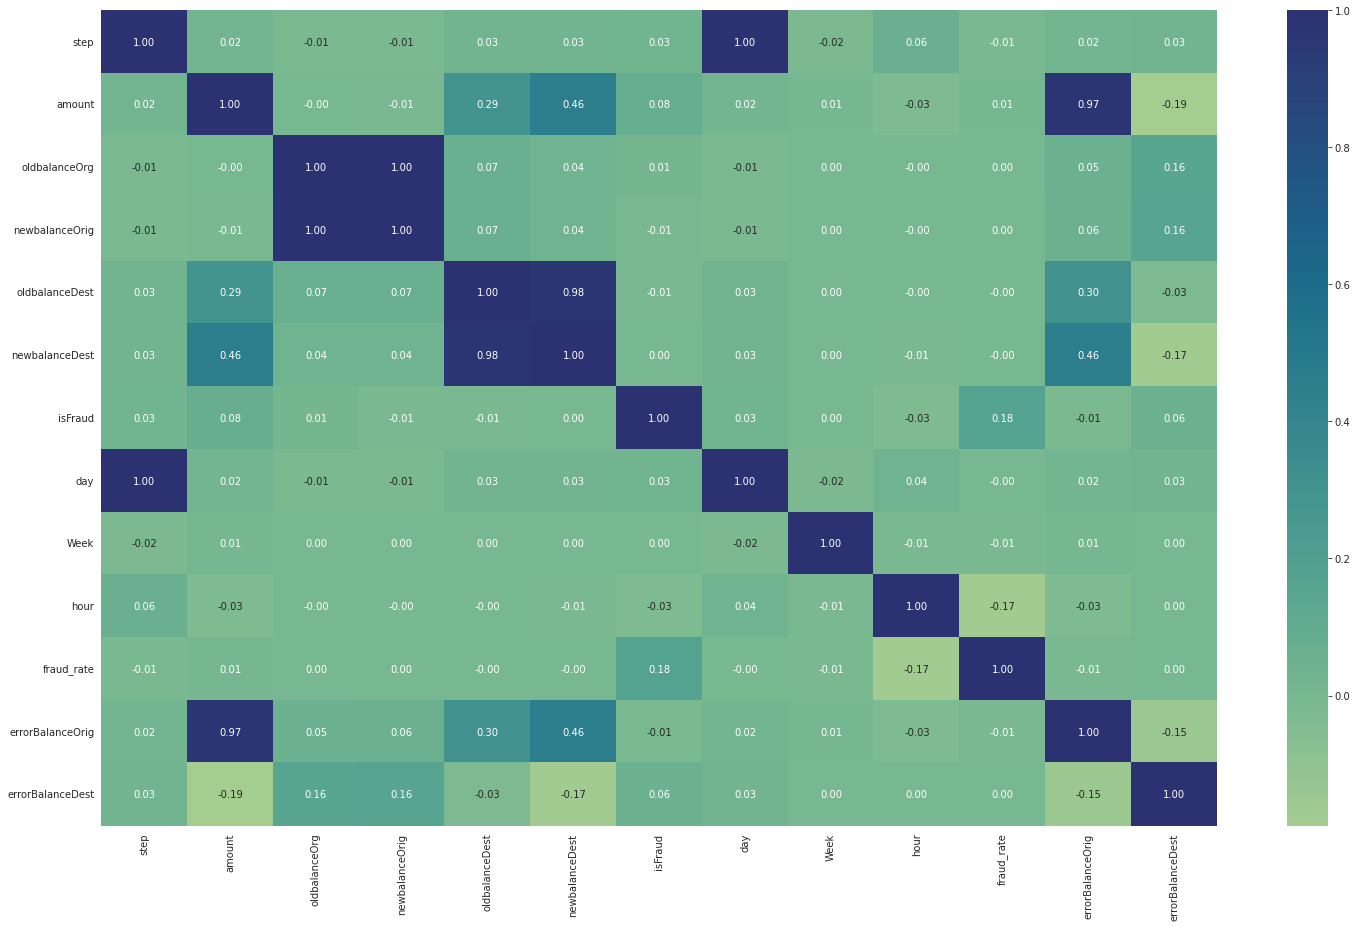

In [ ]:
plt.figure(figsize = (25,15))
sns.heatmap(df.corr(),annot = True, cmap="crest",fmt='.2f')
plt.show()

step newbalanceorg newbalancedest

In [ ]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'day',
       'Week', 'hour', 'fraud_rate', 'section', 'DestType', 'errorBalanceOrig',
       'errorBalanceDest'],
      dtype='object')

In [ ]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,day,Week,hour,fraud_rate,section,DestType,errorBalanceOrig,errorBalanceDest
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,1,1,1,0.013205,S4,M,0.0,9.839640e+03
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,1,1,1,0.013205,S4,M,0.0,1.864280e+03
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,1,1,1,0.013205,S2,C,0.0,1.810000e+02
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,1,1,1,0.013205,S2,C,0.0,2.136300e+04
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,1,1,1,0.013205,S4,M,0.0,1.166814e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,31,1,23,0.002287,S2,C,0.0,0.000000e+00
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,31,1,23,0.002287,S2,C,0.0,6.311409e+06
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,31,1,23,0.002287,S2,C,0.0,1.000000e-02
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,31,1,23,0.002287,S2,C,0.0,8.500025e+05


In [ ]:

df.drop(['nameDest', 'nameOrig','step','newbalanceOrig','newbalanceDest'],1,inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
df.shape

(6362620, 13)

##Processing to dealing with imbalanced data before process with the models.

###Check the Balanced of Dataset

In [ ]:
df.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


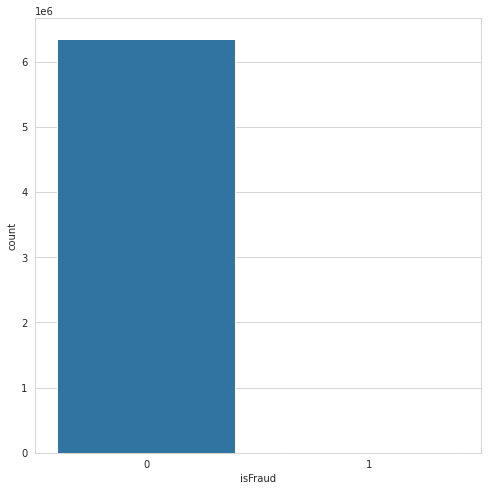

In [ ]:
sns.countplot('isFraud',data=df,)
plt.gcf().set_size_inches(8, 8)

In [ ]:
df.shape

(6362620, 13)

**Undersampling the Majority Class**

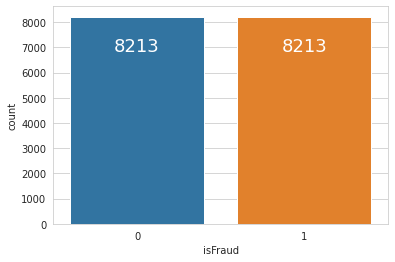

In [ ]:
# shuffle the training dataset
shuffled_data = df.sample(frac=1,random_state=1234)

# put all the fraudulent data in the separate dataset
fraud_data = shuffled_data.loc[shuffled_data['isFraud'] == 1]

# randomly select 9651 data from the normal (majority class)
normal_data = shuffled_data.loc[shuffled_data['isFraud'] == 0].sample(n=8213)

# concatenate both dataframes again
balanced_data = pd.concat([fraud_data, normal_data])

# plot the dataset after the undersampling
ax = sns.countplot(x='isFraud', data=balanced_data)

for p in ax.patches:
  ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.40, p.get_height()), ha='center', va='top', color='white', size=18)

plt.show()

###One Hot Encoding for "gender" and "category" columns

In [ ]:
# One-Hot Encoding
balanced_data = pd.get_dummies(balanced_data, columns=['type'], dummy_na=False)

balanced_data = pd.get_dummies(balanced_data, columns=['section'], dummy_na=False)

balanced_data = pd.get_dummies(balanced_data, columns=['DestType'], dummy_na=False)

In [ ]:
balanced_data.head()

,amount,oldbalanceOrg,oldbalanceDest,isFraud,day,Week,hour,fraud_rate,errorBalanceOrig,errorBalanceDest,...,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,section_S1,section_S2,section_S3,section_S4,DestType_C,DestType_M
6039812,1290619.25,1290619.25,0.0,1,21,3,6,0.104678,0.0,1290619.25,...,0,0,0,1,0,1,0,0,1,0
3948419,712488.25,712488.25,0.0,1,12,0,23,0.002287,0.0,712488.25,...,0,0,0,1,0,1,0,0,1,0
5561949,620512.76,620512.76,0.0,1,17,0,1,0.013205,0.0,0.00,...,1,0,0,0,0,1,0,0,1,0
1030706,8924971.59,8924971.59,59990.3,1,4,1,13,0.000739,0.0,0.00,...,1,0,0,0,0,1,0,0,1,0
6272951,367631.15,367631.15,0.0,1,27,2,1,0.013205,0.0,0.00,...,1,0,0,0,0,1,0,0,1,0


#2. Data Processing

##2.1 Train Test Split

In [ ]:
x = balanced_data.drop(['isFraud'], 1)
y = balanced_data['isFraud']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
x

,amount,oldbalanceOrg,oldbalanceDest,day,Week,hour,fraud_rate,errorBalanceOrig,errorBalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,section_S1,section_S2,section_S3,section_S4,DestType_C,DestType_M
6039812,1290619.25,1290619.25,0.00,21,3,6,0.104678,0.00,1290619.25,0,0,0,0,1,0,1,0,0,1,0
3948419,712488.25,712488.25,0.00,12,0,23,0.002287,0.00,712488.25,0,0,0,0,1,0,1,0,0,1,0
5561949,620512.76,620512.76,0.00,17,0,1,0.013205,0.00,0.00,0,1,0,0,0,0,1,0,0,1,0
1030706,8924971.59,8924971.59,59990.30,4,1,13,0.000739,0.00,0.00,0,1,0,0,0,0,1,0,0,1,0
6272951,367631.15,367631.15,0.00,27,2,1,0.013205,0.00,0.00,0,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5623123,22271.28,0.00,0.00,17,3,11,0.000726,22271.28,22271.28,0,0,0,1,0,1,0,0,0,0,1
4887414,39015.12,0.00,83259.01,15,6,13,0.000739,39015.12,-0.01,0,1,0,0,0,1,0,0,0,1,0
5107773,279374.69,0.00,8980523.06,15,5,19,0.000528,279374.69,0.00,0,1,0,0,0,1,0,0,0,1,0
6224939,37486.23,69853.00,0.00,25,2,14,0.000803,74972.46,37486.23,1,0,0,0,0,0,0,0,1,1,0


In [ ]:
y

6039812    1
3948419    1
5561949    1
1030706    1
6272951    1
          ..
5623123    0
4887414    0
5107773    0
6224939    0
5242314    0
Name: isFraud, Length: 16426, dtype: int64

In [ ]:
import scipy.stats as stats
x = stats.zscore(x)

In [ ]:
x

,amount,oldbalanceOrg,oldbalanceDest,day,Week,hour,fraud_rate,errorBalanceOrig,errorBalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,section_S1,section_S2,section_S3,section_S4,DestType_C,DestType_M
6039812,0.249251,0.015001,-0.226798,0.973302,-0.001462,-1.230940,1.752175,-0.210785,0.641418,-0.351030,-0.857047,-0.058488,-0.456039,1.559977,-0.448030,0.807990,-0.028143,-0.541933,0.456039,-0.456039
3948419,-0.059310,-0.162194,-0.226798,-0.137555,-1.502698,1.579242,-0.304898,-0.210785,0.228813,-0.351030,-0.857047,-0.058488,-0.456039,1.559977,-0.448030,0.807990,-0.028143,-0.541933,0.456039,-0.456039
5561949,-0.108399,-0.190384,-0.226798,0.479588,-1.502698,-2.057464,-0.085551,-0.210785,-0.279681,-0.351030,1.166797,-0.058488,-0.456039,-0.641035,-0.448030,0.807990,-0.028143,-0.541933,0.456039,-0.456039
1030706,4.323867,2.354906,-0.210421,-1.124984,-1.002286,-0.073806,-0.335998,-0.210785,-0.279681,-0.351030,1.166797,-0.058488,-0.456039,-0.641035,-0.448030,0.807990,-0.028143,-0.541933,0.456039,-0.456039
6272951,-0.243367,-0.267891,-0.226798,1.713873,-0.501874,-2.057464,-0.085551,-0.210785,-0.279681,-0.351030,1.166797,-0.058488,-0.456039,-0.641035,-0.448030,0.807990,-0.028143,-0.541933,0.456039,-0.456039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5623123,-0.427693,-0.380569,-0.226798,0.479588,-0.001462,-0.404416,-0.336259,-0.166792,-0.263787,-0.351030,-0.857047,-0.058488,2.192794,-0.641035,2.231993,-1.237639,-0.028143,-0.541933,-2.192794,2.192794
4887414,-0.418756,-0.380569,-0.204069,0.232730,1.499774,-0.073806,-0.335998,-0.133718,-0.279681,-0.351030,1.166797,-0.058488,-0.456039,-0.641035,2.231993,-1.237639,-0.028143,-0.541933,0.456039,-0.456039
5107773,-0.290471,-0.380569,2.224892,0.232730,0.999362,0.918022,-0.340237,0.341069,-0.279681,-0.351030,1.166797,-0.058488,-0.456039,-0.641035,2.231993,-1.237639,-0.028143,-0.541933,0.456039,-0.456039
6224939,-0.419572,-0.359160,-0.226798,1.467016,-0.501874,0.091498,-0.334712,-0.062690,-0.252928,2.848759,-0.857047,-0.058488,-0.456039,-0.641035,-0.448030,-1.237639,-0.028143,1.845246,0.456039,-0.456039


In [ ]:
from sklearn.model_selection import train_test_split

data_splits = train_test_split(x, y, test_size=0.30, random_state=1,shuffle=True, stratify=y)
x_train, x_test, y_train, y_test = data_splits

In [ ]:
print ('Train Dataset : ', x_train.shape)
print ('Test Dataset : ', x_test.shape)

Train Dataset :  (11498, 20)
Test Dataset :  (4928, 20)


In [ ]:
x_train

,amount,oldbalanceOrg,oldbalanceDest,day,Week,hour,fraud_rate,errorBalanceOrig,errorBalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,section_S1,section_S2,section_S3,section_S4,DestType_C,DestType_M
12180,-0.439492,-0.380519,-0.225688,-1.495269,-1.502698,-1.065635,0.382313,-0.210785,-0.276661,-0.351030,1.166797,-0.058488,-0.456039,-0.641035,-0.448030,0.807990,-0.028143,-0.541933,0.456039,-0.456039
3602227,-0.240997,-0.212443,0.852270,-0.260984,0.498950,1.579242,-0.304898,1.259140,0.251406,2.848759,-0.857047,-0.058488,-0.456039,-0.641035,-0.448030,-1.237639,-0.028143,1.845246,0.456039,-0.456039
1716068,-0.436987,-0.380569,-0.226798,-0.754698,1.499774,0.422108,-0.335154,-0.201191,-0.276215,-0.351030,-0.857047,-0.058488,2.192794,-0.641035,2.231993,-1.237639,-0.028143,-0.541933,-2.192794,2.192794
2623755,-0.427287,-0.373510,-0.207748,-0.507841,0.999362,0.422108,-0.335154,-0.210785,-0.279681,-0.351030,1.166797,-0.058488,-0.456039,-0.641035,-0.448030,0.807990,-0.028143,-0.541933,0.456039,-0.456039
5964742,1.781175,0.894729,-0.126419,0.479588,-1.502698,1.413937,-0.314602,-0.210785,-0.279681,-0.351030,1.166797,-0.058488,-0.456039,-0.641035,-0.448030,0.807990,-0.028143,-0.541933,0.456039,-0.456039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2964848,-0.432209,-0.380311,-0.226798,-0.384412,-1.502698,0.256803,-0.334411,-0.185168,-0.269825,-0.351030,-0.857047,-0.058488,2.192794,-0.641035,-0.448030,0.807990,-0.028143,-0.541933,-2.192794,2.192794
2451972,-0.432921,-0.369547,-0.226798,-0.507841,-1.502698,-0.404416,-0.336259,-0.210785,-0.270777,-0.351030,-0.857047,-0.058488,2.192794,-0.641035,-0.448030,-1.237639,-0.028143,1.845246,-2.192794,2.192794
6273674,-0.408345,-0.362633,-0.226798,1.713873,-1.502698,-0.073806,-0.335998,-0.210785,-0.279681,-0.351030,1.166797,-0.058488,-0.456039,-0.641035,-0.448030,0.807990,-0.028143,-0.541933,0.456039,-0.456039
907649,-0.275292,-0.364470,-0.226798,-1.371841,-1.002286,0.918022,-0.340237,0.293488,-0.279681,-0.351030,1.166797,-0.058488,-0.456039,-0.641035,-0.448030,0.807990,-0.028143,-0.541933,0.456039,-0.456039


##2.2 Modeling

In [ ]:
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score

###**2.2.1 Logistic Regression Model**

In [ ]:
from sklearn.linear_model import LogisticRegression
logis= LogisticRegression()
cvs_logis=cross_val_score(logis,x_train,y_train,cv=10)
cvs_logis

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


array([0.96434783, 0.9773913 , 0.96956522, 0.97043478, 0.97913043,
       0.96      , 0.9626087 , 0.96173913, 0.97127937, 0.9721497 ])

In [ ]:
cvs_logis.mean()

0.9688646460059787

In [ ]:
logis.fit(x_train,y_train)
logpred_test = logis.predict(x_test)

In [ ]:
print(confusion_matrix(y_test, logpred_test))

[[2368   96]
 [  53 2411]]


In [ ]:
LOG_accuracy_test=accuracy_score(y_test, logpred_test)
LOG_precision_test= precision_score(y_test, logpred_test)
LOG_recall_test = recall_score(y_test, logpred_test)
LOG_f1_test = f1_score(y_test, logpred_test)
print("LOG_accuracy_test : ", LOG_accuracy_test)
print("LOG_precision_test : ", LOG_precision_test)
print("LOG_recall_test: ", LOG_recall_test)
print("LOG_f1_test : ", LOG_f1_test)

LOG_accuracy_test :  0.9697646103896104
LOG_precision_test :  0.9617072197846032
LOG_recall_test:  0.9784902597402597
LOG_f1_test :  0.9700261516797426


###**2.2.2 Decision Trees Model**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# define the model
dtree = DecisionTreeClassifier(max_depth=3)
cvs_dtree=cross_val_score(dtree,x_train,y_train,cv=10)
cvs_dtree

array([0.9973913 , 0.99652174, 0.9973913 , 0.99652174, 0.99391304,
       0.9973913 , 0.99913043, 0.99826087, 0.99912968, 0.99825936])

In [ ]:
cvs_dtree.mean()

0.9973910773072994

In [ ]:
# fit the model on the whole dataset
dtree.fit(x_train,y_train)
dtreepred_test = dtree.predict(x_test)

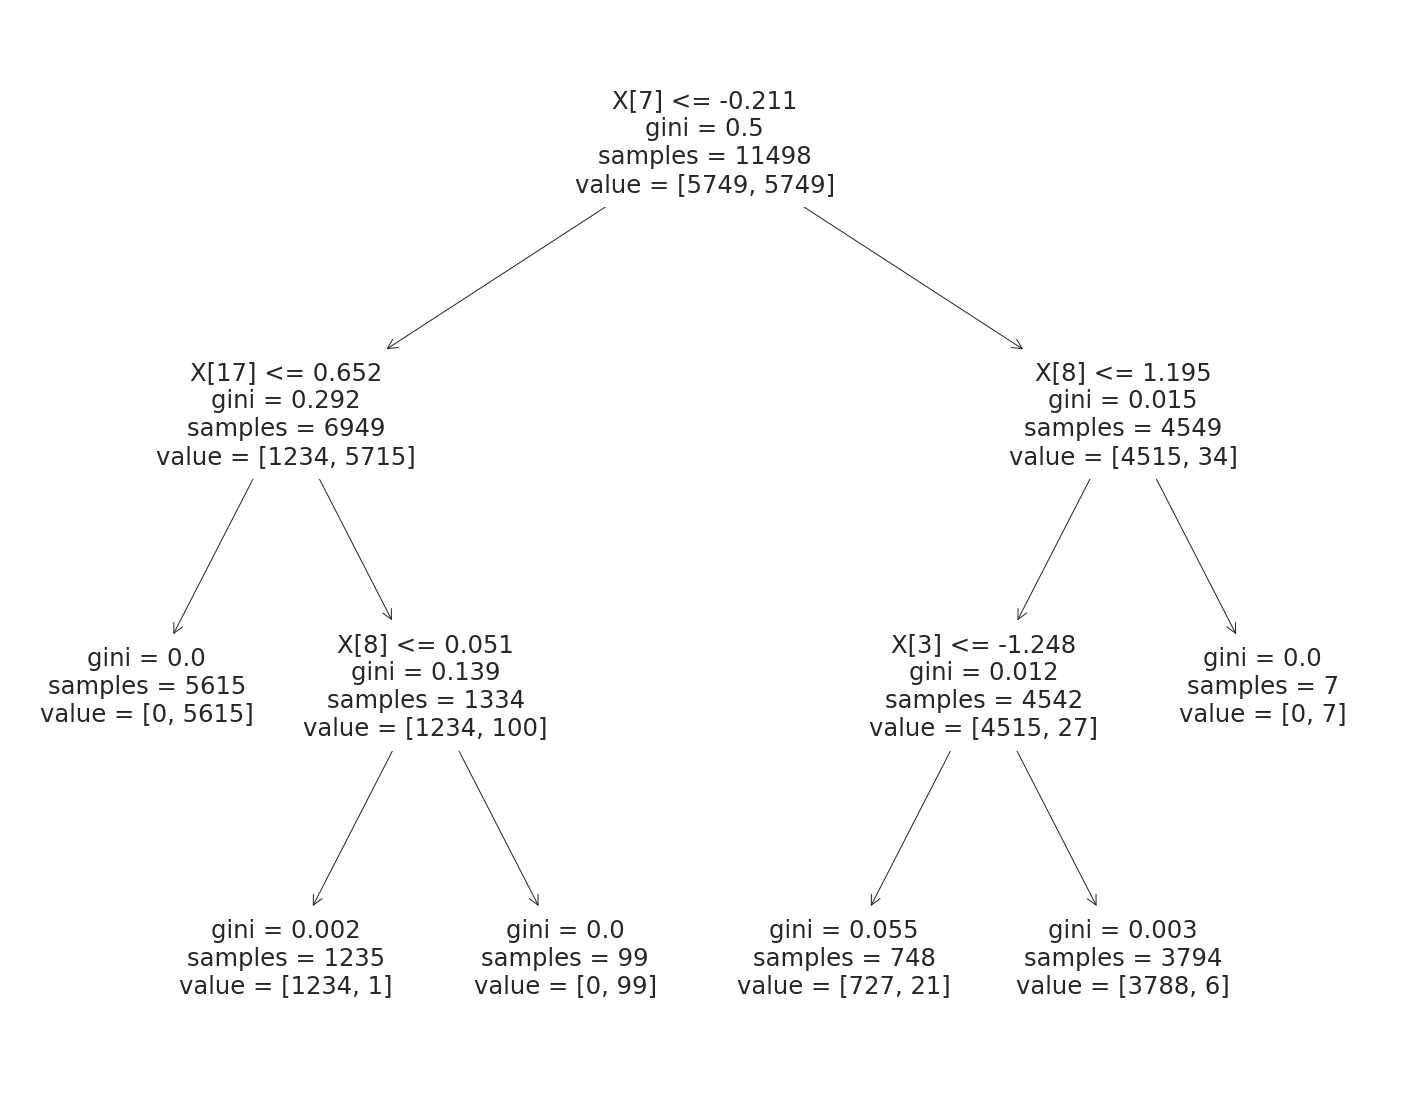

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
tree = tree.plot_tree(dtree)

In [ ]:
dtree_accuracy_test=accuracy_score(y_test, dtreepred_test)
dtree_precision_test= precision_score(y_test, dtreepred_test)
dtree_recall_test = recall_score(y_test, dtreepred_test)
dtree_f1_test = f1_score(y_test, dtreepred_test)
print("dtree_accuracy_test : ", dtree_accuracy_test)
print("dtree_precision_test : ", dtree_precision_test)
print("dtree_recall_test: ", dtree_recall_test)
print("dtree_f1_test : ", dtree_f1_test)

dtree_accuracy_test :  0.9987824675324676
dtree_precision_test :  1.0
dtree_recall_test:  0.997564935064935
dtree_f1_test :  0.9987809833401057


###**2.2.3 Random Forest Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# define the model
RF = RandomForestClassifier(max_depth=5)
cvs_RF=cross_val_score(RF,x_train,y_train,cv=10)
cvs_RF

array([0.9973913 , 0.99652174, 0.99826087, 0.99652174, 0.99391304,
       0.9973913 , 0.99913043, 0.99826087, 0.99825936, 0.99825936])

In [ ]:
cvs_RF.mean()

0.9973910016271237

In [ ]:
# fit the model on the whole dataset
RF.fit(x_train, y_train)
RFpred_test = RF.predict(x_test)

In [ ]:
confusion_matrix(y_test, RFpred_test)

array([[2464,    0],
       [   6, 2458]])

In [ ]:
RF_accuracy_test=accuracy_score(y_test, RFpred_test)
RF_precision_test= precision_score(y_test, RFpred_test)
RF_recall_test = recall_score(y_test, RFpred_test)
RF_f1_test = f1_score(y_test, RFpred_test)
print("RF_accuracy_test : ", RF_accuracy_test)
print("RF_precision_test : ", RF_precision_test)
print("RF_recall_test: ", RF_recall_test)
print("RF_f1_test : ", RF_f1_test)

RF_accuracy_test :  0.9987824675324676
RF_precision_test :  1.0
RF_recall_test:  0.997564935064935
RF_f1_test :  0.9987809833401057


###**2.2.4 Artificial Neural Network Model** **bold text**

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(19,19,19), activation='relu',  max_iter=50,random_state=1234)
cvs_mlp=cross_val_score(mlp,x_train,y_train,cv=10)
cvs_mlp

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilaye

array([0.99130435, 0.99565217, 0.99391304, 0.99478261, 0.99304348,
       0.99391304, 0.99130435, 0.99043478, 0.99477807, 0.99477807])

In [ ]:
cvs_mlp.mean()

0.9933903961857192

In [ ]:
mlp.fit(x_train,y_train)
NN_test = mlp.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
confusion_matrix(y_test, NN_test)

array([[2443,   21],
       [  14, 2450]])

In [ ]:
NN_accuracy_test=accuracy_score(y_test, NN_test)
NN_precision_test= precision_score(y_test, NN_test)
NN_recall_test = recall_score(y_test, NN_test)
NN_f1_test = f1_score(y_test, NN_test)
print("NN_accuracy_test : ", NN_accuracy_test)
print("NN_precision_test : ", NN_precision_test)
print("NN_recall_test: ", NN_recall_test)
print("NN_f1_test : ", NN_f1_test)

NN_accuracy_test :  0.9928977272727273
NN_precision_test :  0.9915014164305949
NN_recall_test:  0.9943181818181818
NN_f1_test :  0.9929078014184397


###**2.2.5 Support Vector Machine Model**

In [ ]:
from sklearn.svm import SVC
svc= SVC(kernel = 'sigmoid')
cvs_svc=cross_val_score(svc,x_train,y_train,cv=10)
cvs_svc

array([0.93826087, 0.94782609, 0.95217391, 0.92956522, 0.96173913,
       0.93217391, 0.93826087, 0.92086957, 0.9408181 , 0.92950392])

In [ ]:
cvs_svc.mean()

0.9391191584364474

In [ ]:
svc.fit(x_train,y_train)
svcpred_test = svc.predict(x_test)

In [ ]:
print(confusion_matrix(y_test, svcpred_test))

[[2302  162]
 [ 155 2309]]


In [ ]:
SVC_accuracy_test=accuracy_score(y_test, svcpred_test)
SVC_precision_test= precision_score(y_test, svcpred_test)
SVC_recall_test = recall_score(y_test, svcpred_test)
SVC_f1_test = f1_score(y_test, svcpred_test)
print("SVC_accuracy_test : ", SVC_accuracy_test)
print("SVC_precision_test : ", SVC_precision_test)
print("SVC_recall_test: ", SVC_recall_test)
print("SVC_f1_test : ", SVC_f1_test)

SVC_accuracy_test :  0.9356737012987013
SVC_precision_test :  0.934439498178875
SVC_recall_test:  0.9370941558441559
SVC_f1_test :  0.9357649442755827


###**2.2.6 Naive Bayes Model**

In [ ]:
from sklearn.naive_bayes import GaussianNB
gaussiannb= GaussianNB()
cvs_gaussiannb=cross_val_score(gaussiannb,x_train,y_train,cv=10)
cvs_gaussiannb

array([0.88      , 0.89130435, 0.88086957, 0.89217391, 0.89478261,
       0.88      , 0.86695652, 0.88521739, 0.89208007, 0.89295039])

In [ ]:
cvs_gaussiannb.mean()

0.8856334809096758

In [ ]:
gaussiannb.fit(x_train,y_train)
gaussiannbpred_test = gaussiannb.predict(x_test)

In [ ]:
print(confusion_matrix(y_test, gaussiannbpred_test ))

[[1897  567]
 [  15 2449]]


In [ ]:
Gaussiannbpred_accuracy_test=accuracy_score(y_test, gaussiannbpred_test)
Gaussiannbpred_precision_test= precision_score(y_test, gaussiannbpred_test)
Gaussiannbpred_recall_test = recall_score(y_test, gaussiannbpred_test)
Gaussiannbpred_f1_test = f1_score(y_test, gaussiannbpred_test)
print("Gaussiannbpred_accuracy_test : ", Gaussiannbpred_accuracy_test)
print("Gaussiannbpred_precision_test : ", Gaussiannbpred_precision_test)
print("Gaussiannbpred_recall_test: ", Gaussiannbpred_recall_test)
print("Gaussiannbpred_f1_test : ", Gaussiannbpred_f1_test)

Gaussiannbpred_accuracy_test :  0.8818993506493507
Gaussiannbpred_precision_test :  0.8120026525198939
Gaussiannbpred_recall_test:  0.9939123376623377
Gaussiannbpred_f1_test :  0.8937956204379561


###**2.2.7 k-Nearest Neighbor Model**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {"n_neighbors": range(1, 25)}

gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 25)})

In [ ]:
gridsearch.best_params_

{'n_neighbors': 5}

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)

cvs_knn=cross_val_score(knn,x_train,y_train,cv=10)
cvs_knn

array([0.95304348, 0.95652174, 0.95043478, 0.95826087, 0.95391304,
       0.94869565, 0.95304348, 0.96347826, 0.95387293, 0.95387293])

In [ ]:
cvs_knn.mean()

0.9545137170318234

In [ ]:
knn.fit(x_train,y_train)
knnpred_test = knn.predict(x_test)

In [ ]:
print(confusion_matrix(y_test, knnpred_test))

[[2370   94]
 [ 135 2329]]


In [ ]:
KNN_accuracy_test=accuracy_score(y_test, knnpred_test)
KNN_precision_test= precision_score(y_test, knnpred_test)
KNN_recall_test = recall_score(y_test, knnpred_test)
KNN_f1_test = f1_score(y_test, knnpred_test)
print("KNN_accuracy_test : ", KNN_accuracy_test)
print("KNN_precision_test : ", KNN_precision_test)
print("KNN_recall_test: ", KNN_recall_test)
print("KNN_f1_test : ", KNN_f1_test)

KNN_accuracy_test :  0.9535308441558441
KNN_precision_test :  0.9612051176227817
KNN_recall_test:  0.945211038961039
KNN_f1_test :  0.9531409862901575


###**2.2.8 XGBoost**

In [ ]:
#import xgboost as xgb
from xgboost import XGBClassifier

In [ ]:
xgb= XGBClassifier(max_depth=3)
cvs_xgb=cross_val_score(xgb,x_train,y_train,cv=10)
cvs_xgb

array([0.9973913 , 0.99826087, 0.99826087, 0.99652174, 0.99478261,
       0.9973913 , 0.99913043, 0.99826087, 0.99912968, 0.99912968])

In [ ]:
cvs_xgb.mean()

0.9978259355961707

In [ ]:
xgb.fit(x_train, y_train)
xgbpred_test = xgb.predict(x_test)

In [ ]:
print(confusion_matrix(y_test, xgbpred_test))

[[2464    0]
 [   5 2459]]


In [ ]:
xgb_accuracy_test=accuracy_score(y_test, xgbpred_test)
xgb_precision_test= precision_score(y_test, xgbpred_test)
xgb_recall_test = recall_score(y_test, xgbpred_test)
xgb_f1_test = f1_score(y_test, xgbpred_test)
print("xgb_accuracy_test : ", xgb_accuracy_test)
print("xgb_precision_test : ", xgb_precision_test)
print("xgb_recall_test: ", xgb_recall_test)
print("xgb_f1_test : ", xgb_f1_test)

xgb_accuracy_test :  0.9989853896103896
xgb_precision_test :  1.0
xgb_recall_test:  0.9979707792207793
xgb_f1_test :  0.9989843591306115


## **Model Comparison**


In [ ]:
model_eval = pd.DataFrame({'Model': ['Logistic Regression','Decision Tree', 'Random Forest', 'Artificial Neural Network' , 'SVM' , 'Naive Bayes', 'k-Nearest Neighbor', 'XGBoost'],
                           'Accuracy': [LOG_accuracy_test * 100, dtree_accuracy_test * 100, RF_accuracy_test * 100, NN_accuracy_test * 100,SVC_accuracy_test * 100, Gaussiannbpred_accuracy_test * 100, KNN_accuracy_test * 100, xgb_accuracy_test * 100],
                           'Precision': [LOG_precision_test * 100, dtree_precision_test * 100, RF_precision_test * 100, NN_precision_test * 100,SVC_precision_test * 100, Gaussiannbpred_precision_test * 100, KNN_precision_test * 100, xgb_precision_test * 100],
                           'Recall': [LOG_recall_test * 100, dtree_recall_test * 100, RF_recall_test * 100, NN_recall_test * 100,SVC_recall_test * 100, Gaussiannbpred_recall_test * 100, KNN_recall_test * 100, xgb_recall_test * 100],
                           'F1 Score': [LOG_f1_test * 100, dtree_f1_test * 100, RF_f1_test * 100, NN_f1_test * 100,SVC_f1_test * 100, Gaussiannbpred_f1_test * 100, KNN_f1_test * 100, xgb_f1_test * 100]})
model_eval

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,96.976461,96.170722,97.849026,97.002615
1,Decision Tree,99.878247,100.000000,99.756494,99.878098
2,Random Forest,99.878247,100.000000,99.756494,99.878098
3,Artificial Neural Network,99.289773,99.150142,99.431818,99.290780
4,SVM,93.567370,93.443950,93.709416,93.576494
5,Naive Bayes,88.189935,81.200265,99.391234,89.379562
6,k-Nearest Neighbor,95.353084,96.120512,94.521104,95.314099
7,XGBoost,99.898539,100.000000,99.797078,99.898436


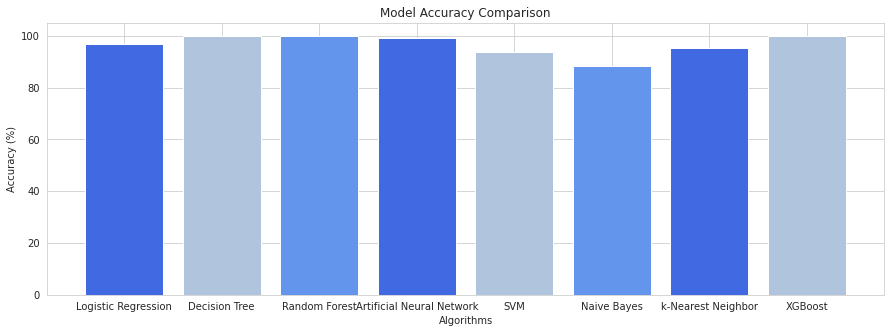

In [ ]:
colors = ['royalblue', 'lightsteelblue', 'cornflowerblue']
plt.figure(figsize=(15, 5))
plt.title("Model Accuracy Comparison")
plt.xlabel("Algorithms")
plt.ylabel("Accuracy (%)")
plt.bar(model_eval['Model'], model_eval['Accuracy'], color = colors)
plt.show()

##AUC

In [ ]:
# Import the classifiers
from sklearn.metrics import roc_curve, roc_auc_score


# Instantiate the classfiers and make a list
classifiers = [LogisticRegression(),
               DecisionTreeClassifier(max_depth=3),
               RandomForestClassifier(max_depth=5),
               MLPClassifier(hidden_layer_sizes=(19,19,19), activation='relu',max_iter=50),
               SVC(probability=True,kernel = 'sigmoid'),
               GaussianNB(),
               KNeighborsClassifier(n_neighbors=3),
               XGBClassifier(max_depth=3)
               ]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(x_train,y_train)
    yproba = model.predict_proba(x_test)[::,1]

    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)

    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


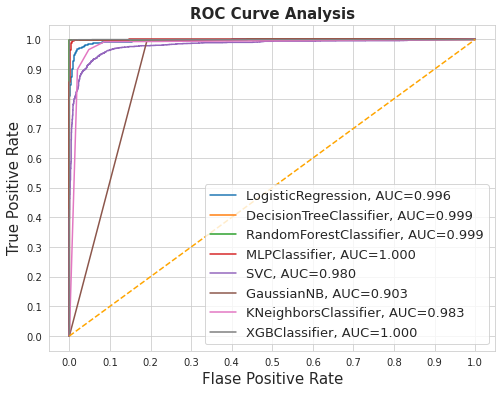

In [ ]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'],
             result_table.loc[i]['tpr'],
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()